In [88]:
import pandas as pd
data = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [87]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

In [90]:
# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

In [97]:
from sklearn.model_selection import train_test_split
import numpy as np
y = data.Survived
#preX = pd.get_dummies(train.drop('Survived', axis=1))
#my_imputer = Imputer()
sex = pd.Series( np.where( data.Sex == 'male' , 1 , 0 ) , name = 'Sex' )
embarked = pd.get_dummies(data.Embarked, prefix = 'Embarked')
pClass =  pd.get_dummies(data.Pclass, prefix = 'Pclass')
age = data.Age.fillna( data.Age.mean() )
fare = data.Fare.fillna( data.Fare.mean() )

splitNames = data[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )
mappedToTitles = splitNames.map( Title_Dictionary )
title = pd.get_dummies( mappedToTitles, prefix = 'Title' )

preCabin = data.Cabin.fillna( 'U' ).map(lambda c: c[0])
cabin = pd.get_dummies( preCabin, prefix = 'Cabin' )


In [99]:
colsToUse = ['Pclass', 'Sex', 'Age', 'Fare', 'Title', 'Cabin', 'Embarked']
data_X = pd.concat( [pClass, sex, age, fare, title, cabin, embarked ] , axis=1 )
data_X.head()

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,1,22.0,7.2500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,38.0,71.2833,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,26.0,7.9250,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,35.0,53.1000,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,0,1,1,35.0,8.0500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [102]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingClassifier

train_X, val_X, train_y, val_y = train_test_split(data_X, y, random_state = 0)

In [103]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.03)
model.fit(train_X, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

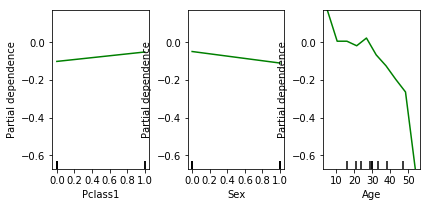

In [105]:
my_plots = plot_partial_dependence(model,       
                                   features=[0, 3, 4], # column numbers of plots we want to show
                                   X=train_X,            # raw predictors data.
                                   feature_names=['Pclass1','Pclass2','Pclass3','Sex','Age'], # labels on graphs
                                   grid_resolution=10) 

In [106]:
from sklearn.metrics import mean_absolute_error

predictedY = model.predict(val_X)
mean_absolute_error(val_y, predictedY)

0.18834080717488788

In [107]:
from sklearn.tree import DecisionTreeClassifier

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

0.985409652076


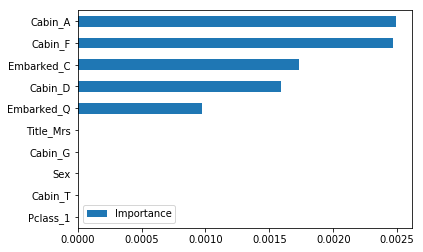

In [108]:
plot_variable_importance(data_X, y)

In [111]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

In [112]:
plot_distribution( data_X , var = 'Age' , target = 'Survived' , row = 'Sex' )

KeyError: 'Survived'